In [ ]:
import pandas as pd
df = pd.read_csv('marketing.csv') # assume file is in same dir

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   index  Television  Socia_Network  newspaper   Turnover
0      1      200.92         142.17     145.41   943.0419
1      2      156.26         129.85      62.70   856.2597
2      3      124.38         187.57     140.04   964.9689
3      4      157.69         187.48     143.94  1017.4412
4      5      158.23         222.41     116.04  1115.2990
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          200 non-null    int64  
 1   Television     200 non-null    float64
 2   Socia_Network  200 non-null    float64
 3   newspaper      200 non-null    float64
 4   Turnover       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
            index  Television  Socia_Network   newspaper     Turnover
count  200.000000  200.000000     200.000000  200.000000   200.000000
mean   100.500000  149.396050     173.063350 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

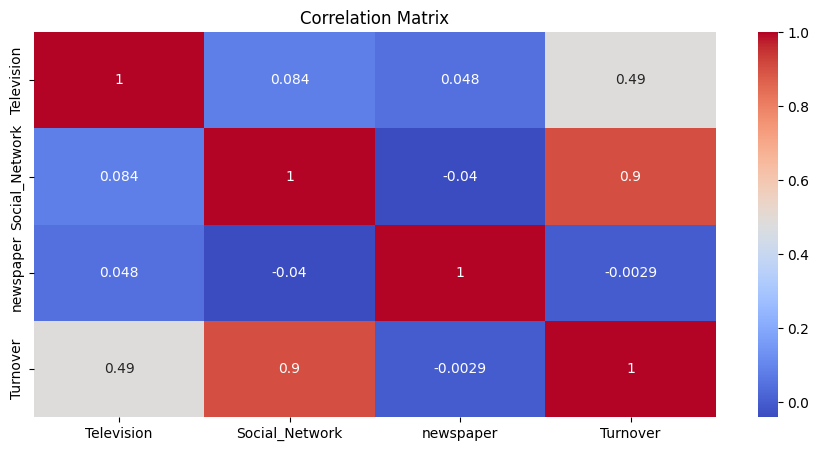


Model Performance:
R^2 score: 0.9885170490557913
Mean Squared Error: 183.40830483642748



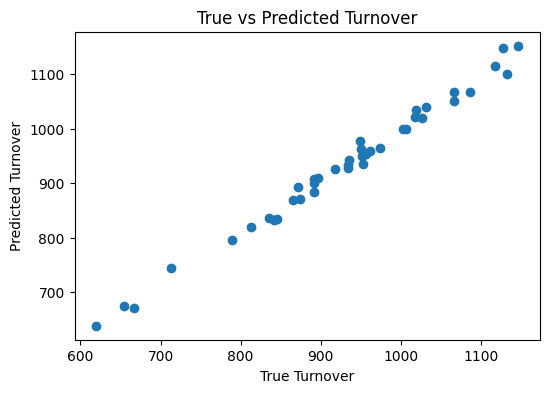

In [ ]:
df = df.drop(columns=['index'])

plt.figure(figsize=(11,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') # heatmap uses matplotlib
plt.title("Correlation Matrix")
plt.show()

X = df[['Television', 'Social_Network', 'newspaper']] # iv
y = df['Turnover'] # dv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Performance:")
print("R^2 score:", r2_score(y_test, y_pred))
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}\n")

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.title("True vs Predicted Turnover")
plt.xlabel("True Turnover")
plt.ylabel("Predicted Turnover")
plt.show()

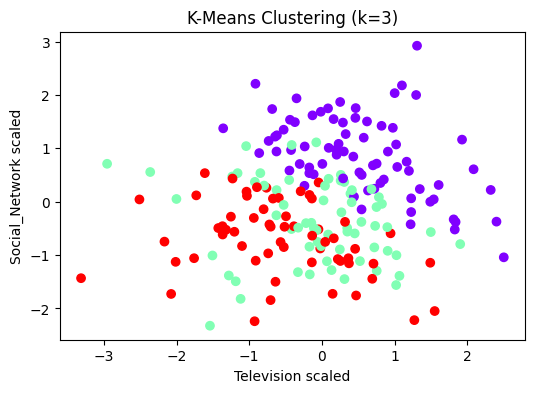


K-Means Cluster Centers Scaled:
[[ 0.52315594  0.87298953 -0.32063866]
 [-0.08724532 -0.37409204  1.10518568]
 [-0.55942916 -0.68597053 -0.79648616]]



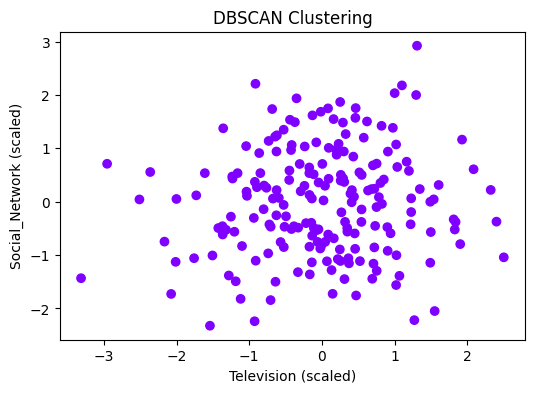


Cluster Counts:
K-Means: [75 65 60]
DBSCAN: [  0 200]


In [ ]:
X = df[['Television', 'Social_Network', 'newspaper']] # 200, 3

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # scaling is crucial for sets with different ranges to be used on kmeans and dbscan

k_means = KMeans(n_clusters=3, random_state=42, n_init=10)
k_means_labels = k_means.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=k_means_labels, cmap='rainbow') # all rows on column index 0 and all rows on column index 1
plt.title("K-Means Clustering (k=3)")
plt.xlabel("Television scaled")
plt.ylabel("Social_Network scaled")
plt.show()

print(f"\nK-Means Cluster Centers Scaled:")
print(f"{k_means.cluster_centers_}\n")


dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.xlabel("Television (scaled)")
plt.ylabel("Social_Network (scaled)")
plt.show()

print("\nCluster Counts:")
print("K-Means:", np.bincount(k_means_labels))
print("DBSCAN:", np.bincount(dbscan_labels + 1))